In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
files=!ls ../../input/feat/*fwv*softmax*.parq |grep -v pca

In [3]:
files

['../../input/feat/dense_train_seq_fwvsoftmax_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_18_fwvsoftmax_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_19_fwvsoftmax_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_20_fwvsoftmax_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_21_fwvsoftmax_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_22_fwvsoftmax_offset_.parq',
 '../../input/feat/test_fwvsoftmax_offset_.parq',
 '../../input/feat/train_seq_coverage_18_fwvsoftmax_offset_.parq',
 '../../input/feat/train_seq_coverage_19_fwvsoftmax_offset_.parq',
 '../../input/feat/train_seq_coverage_20_fwvsoftmax_offset_.parq',
 '../../input/feat/train_seq_coverage_21_fwvsoftmax_offset_.parq',
 '../../input/feat/train_seq_coverage_22_fwvsoftmax_offset_.parq',
 '../../input/feat/train_seq_offset_000000_fwvsoftmax_offset_.parq',
 '../../input/feat/train_seq_offset_037500_fwvsoftmax_offset_.parq',
 '../../input/feat/train_seq_offset_075000_fwvsoftmax_offset_.parq

In [4]:
lst1=[fastparquet.ParquetFile(u).to_pandas() for u in files ]
df1=pd.concat(lst1)
df1.shape

(1115154, 2625)

In [5]:
df1.shape

(1115154, 2625)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115154 entries, quake_03_0200_105000 to quake_08_0161
Columns: 2625 entries, fwvsoftmax_0 to y
dtypes: float32(2624), float64(1)
memory usage: 10.9+ GB


In [7]:
df1.head()

fwvsoftmax_0  fwvsoftmax_1  fwvsoftmax_2  fwvsoftmax_3  \
index                                                                          
quake_03_0200_105000      0.000388      0.000393      0.000381      0.000387   
quake_06_0120_099000      0.000391      0.000408      0.000375      0.000389   
quake_07_0296_013500      0.000391      0.000399      0.000388      0.000393   
quake_03_0090_034500      0.000375      0.000367      0.000399      0.000384   
quake_08_0137_055500      0.000373      0.000368      0.000393      0.000381   

                      fwvsoftmax_4  fwvsoftmax_5  fwvsoftmax_6  fwvsoftmax_7  \
index                                                                          
quake_03_0200_105000      0.000359      0.000414      0.000388      0.000379   
quake_06_0120_099000      0.000348      0.000418      0.000398      0.000376   
quake_07_0296_013500      0.000340      0.000453      0.000394      0.000388   
quake_03_0090_034500      0.000377      0.000421      0.000371      0.000399   
quake_08_0137_055500      0.000387      0.000406      0.000369      0.000395   

                      fwvsoftmax_8  fwvsoftmax_9  ...  fwvsoftmax_2615  \
index                                             ...                    
quake_03_0200_105000      0.000379      0.000395  ...         0.000395   
quake_06_0120_099000      0.000369      0.000402  ...         0.000406   
quake_07_0296_013500      0.000389      0.000398  ...         0.000405   
quake_03_0090_034500      0.000411      0.000371  ...         0.000377   
quake_08_0137_055500      0.000404      0.000368  ...         0.000374   

                      fwvsoftmax_2616  fwvsoftmax_2617  fwvsoftmax_2618  \
index                                                                     
quake_03_0200_105000         0.000381         0.000372         0.000383   
quake_06_0120_099000         0.000375         0.000373         0.000391   
quake_07_0296_013500         0.000387         0.000354         0.000375   
quake_03_0090_034500         0.000396         0.000356         0.000356   
quake_08_0137_055500         0.000391         0.000364         0.000360   

                      fwvsoftmax_2619  fwvsoftmax_2620  fwvsoftmax_2621  \
index                                                                     
quake_03_0200_105000         0.000383         0.000383         0.000374   
quake_06_0120_099000         0.000370         0.000393         0.000374   
quake_07_0296_013500         0.000399         0.000373         0.000366   
quake_03_0090_034500         0.000433         0.000353         0.000369   
quake_08_0137_055500         0.000423         0.000361         0.000372   

                      fwvsoftmax_2622  fwvsoftmax_2623         y  
index                                                             
quake_03_0200_105000         0.000372         0.000383  0.998098  
quake_06_0120_099000         0.000363         0.000390  2.318898  
quake_07_0296_013500         0.000366         0.000376  4.532197  
quake_03_0090_034500         0.000383         0.000358  5.302996  
quake_08_0137_055500         0.000383         0.000363  2.514399  

[5 rows x 2625 columns]

In [8]:
X=df1.drop('y',axis=1).values
X.shape

(1115154, 2624)

In [9]:
import numpy as np
from sklearn.decomposition import PCA

In [10]:
n_components=10
pca = PCA(n_components=n_components, svd_solver='randomized')

In [11]:
%%time
pca.fit(X)
print(np.sum(pca.explained_variance_ratio_)  )
print(pca.explained_variance_ratio_)  

0.9998813058499422
[5.74743555e-01 4.21643197e-01 2.43108727e-03 6.10761144e-04
 1.75404741e-04 8.44432053e-05 7.13376712e-05 5.52789681e-05
 3.95166607e-05 2.67242577e-05]
CPU times: user 1min 47s, sys: 6.93 s, total: 1min 54s
Wall time: 44.1 s


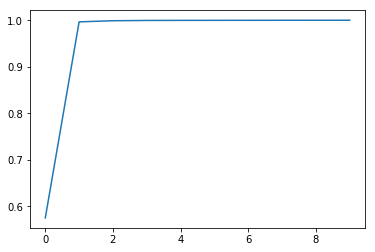

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

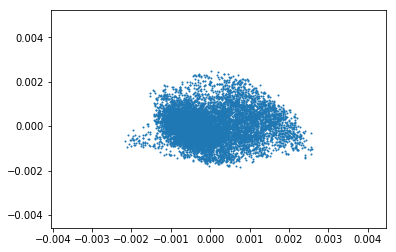

In [13]:
a=pca.transform(X[np.random.permutation(range(len(X)))[:10000]])
plt.scatter(a[:,0],a[:,1],s=1)

In [14]:
for fname in files:
    fname2=fname.replace("_fwvsoftmax_", "_fwvsoftmax_pca{}_".format(n_components))
    assert(fname<>fname2)
    print fname2
    adf = fastparquet.ParquetFile(fname).to_pandas()
    ax=adf.drop('y',axis=1).values
    atx = pca.transform(ax)
    adf2=pd.DataFrame(atx,index=adf.index,columns=["fwvsoftmax_pca{}_{}".format(n_components,i) for i in range(n_components)])
    adf2['y']=adf['y']
    fastparquet.write(fname2,adf2,compression='SNAPPY')
    #break

../../input/feat/dense_train_seq_fwvsoftmax_pca10_offset_.parq


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/fastparquet/util.py:221: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  inferred_dtype = infer_dtype(column)


../../input/feat/sp_train_seq_coverage_18_fwvsoftmax_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_19_fwvsoftmax_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_20_fwvsoftmax_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_21_fwvsoftmax_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_22_fwvsoftmax_pca10_offset_.parq
../../input/feat/test_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_coverage_18_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_coverage_19_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_coverage_20_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_coverage_21_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_coverage_22_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_offset_000000_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_offset_037500_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_offset_075000_fwvsoftmax_pca10_offset_.parq
../../input/feat/train_seq_off

In [15]:
fname

'../../input/feat/train_seq_offset_112500_fwvsoftmax_offset_.parq'